# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [202]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import calendar
import requests

In [203]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [204]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [205]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [206]:
# Extract all rows of data
all_rows = soup.find_all('tr')
all_rows

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [207]:
# Create an empty list
mars_data = []

# Loop through the scraped data to create a list of rows
header_row = soup.find('tr')
headers = [header.get_text() for header in header_row.find_all('th')]

# Print the headers to check the content
print(headers)

# Extract all rows of data
rows = soup.find_all('tr')[1:]  # Skip the header row

# Loop through the scraped data to create a list of rows
for row in rows:
    row_data = [cell.get_text() for cell in row.find_all('td')]
    mars_data.append(row_data)

# Print the rows_data to check the content
for row in mars_data[:5]:
    print(row)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']


In [208]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_data, columns=headers)

In [209]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [210]:
# Examine data type of each column
mars_df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [211]:
# Change data types for data analysis
mars_df['id'] = mars_df['id'].astype(int)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(float)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)


In [212]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [213]:
# 1. How many months are there on Mars?
mars_months = mars_df['month'].nunique()
mars_months

12

In [214]:
# 2. How many sols (Martian days) worth of data are there?
mars_days = mars_df['sol'].nunique()
mars_days

1867

In [215]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_df.groupby('month')['min_temp'].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

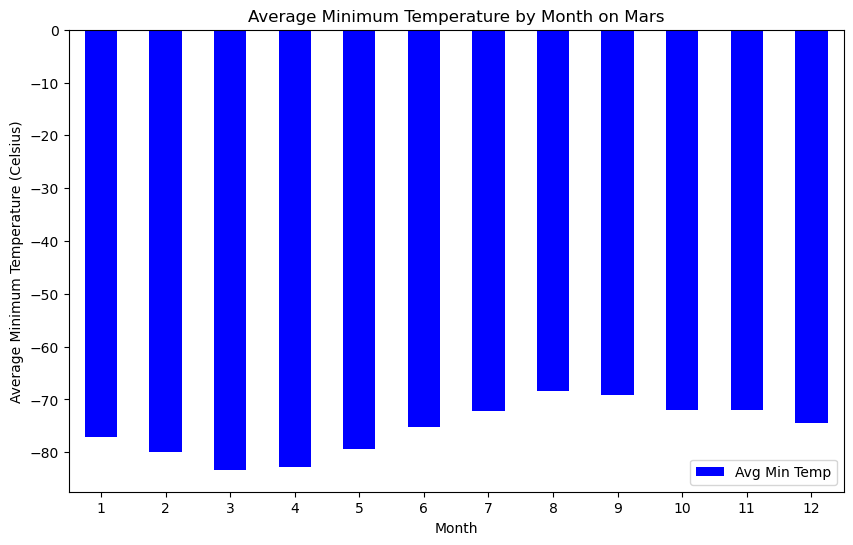

In [216]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (Celsius)')
plt.xticks(rotation=0)
plt.legend(['Avg Min Temp'])
plt.show()


The coldest month on Mars is month number 3 at -83.30729166666667
The hottest month on Mars is month number 8 at -68.38297872340425


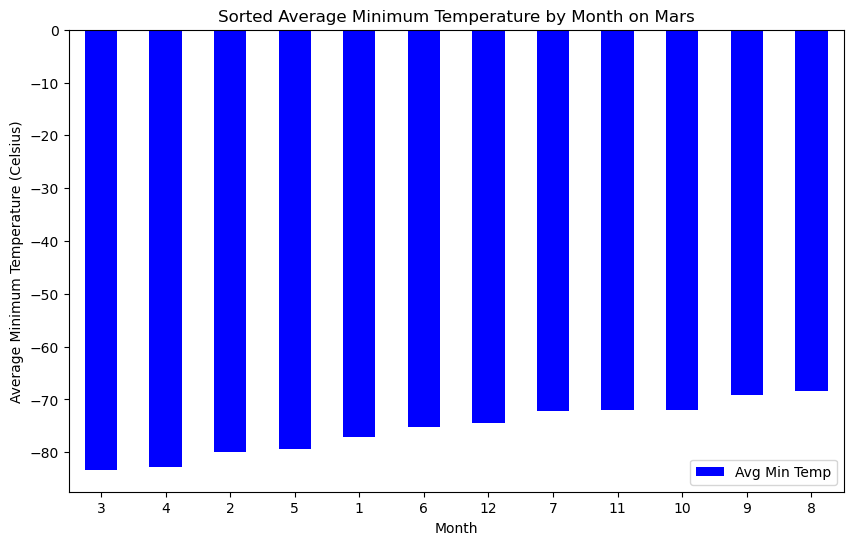

In [217]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_temp = avg_min_temp.min()
coldest_temp_month = avg_min_temp.idxmin() 
hottest_temp = avg_min_temp.max()
hottest_temp_month = avg_min_temp.idxmax()

print(f'The coldest month on Mars is month number {coldest_temp_month} at {coldest_temp}')
print(f'The hottest month on Mars is month number {hottest_temp_month} at {hottest_temp}')

sorted_avg_min_temp = avg_min_temp.sort_values()

#plot the results of the resorted values
sorted_avg_min_temp.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Sorted Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (Celsius)')
plt.xticks(rotation=0)
plt.legend(['Avg Min Temp'])
plt.show()

In [218]:
# 4. What is the average pressure by month?
avg_pressure = mars_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

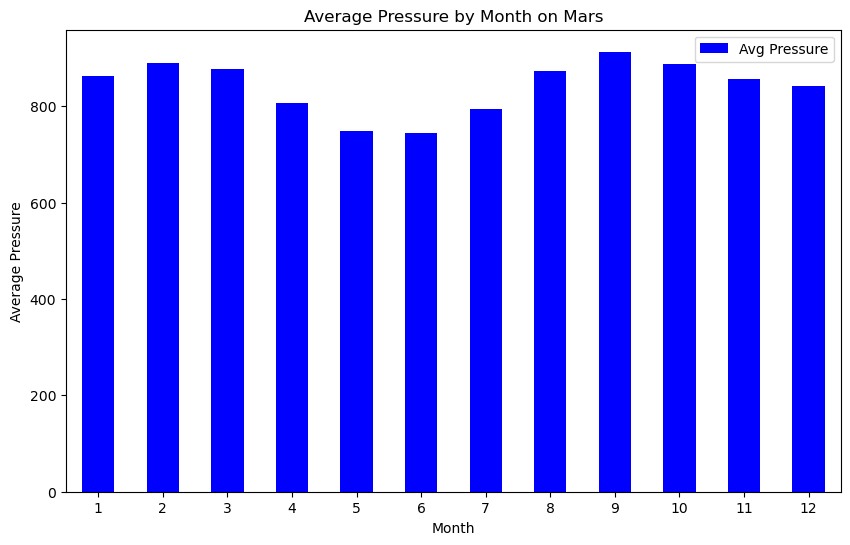

In [219]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.xticks(rotation=0)
plt.legend(['Avg Pressure'])
plt.show()

The lowest pressure month on Mars is month number 6 at 745.0544217687075
The highest pressure month on Mars is month number 9 at 913.3059701492538


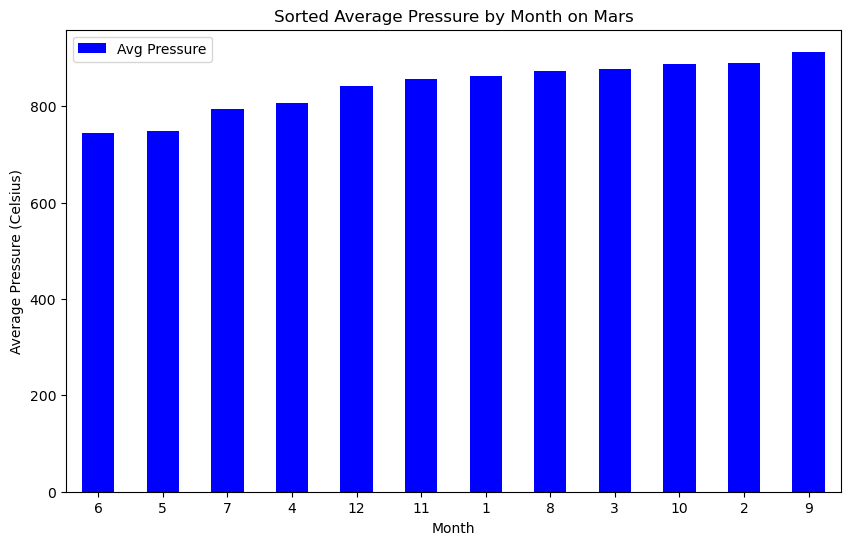

In [220]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure = avg_pressure.min()
lowest_pressure_month = avg_pressure.idxmin() 
highest_pressure = avg_pressure.max()
highest_pressure_month = avg_pressure.idxmax()

print(f'The lowest pressure month on Mars is month number {lowest_pressure_month} at {lowest_pressure}')
print(f'The highest pressure month on Mars is month number {highest_pressure_month} at {highest_pressure}')

sorted_avg_pressure = avg_pressure.sort_values()

#plot the results of the resorted values
sorted_avg_pressure.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Sorted Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Celsius)')
plt.xticks(rotation=0)
plt.legend(['Avg Pressure'])
plt.show()

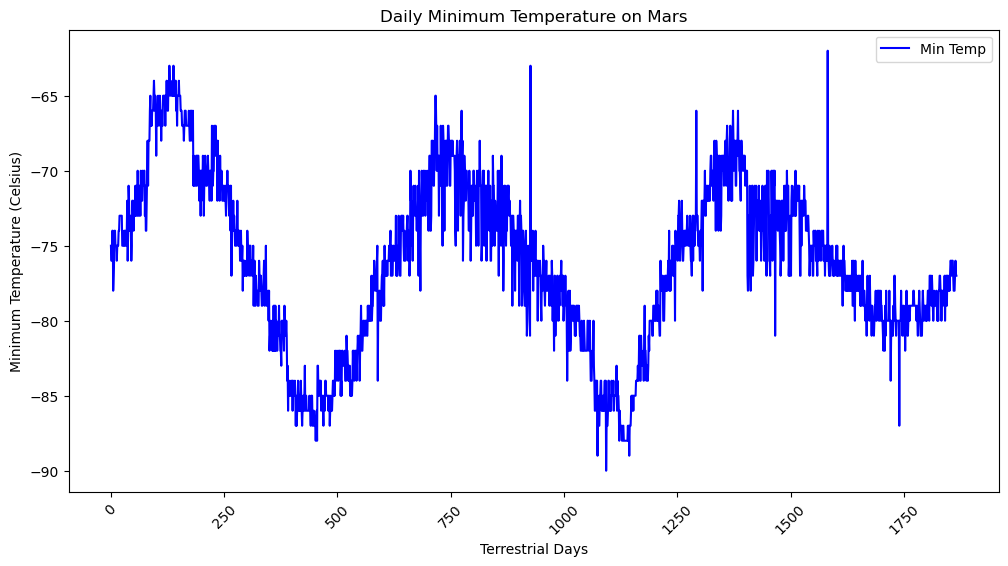

In [221]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
days_in_year = range(len(mars_df))
plt.figure(figsize=(12, 6))
plt.plot(days_in_year, mars_df['min_temp'], color='blue')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Days')
plt.ylabel('Minimum Temperature (Celsius)')
plt.xticks(rotation=45)
plt.legend(['Min Temp'])
plt.show()


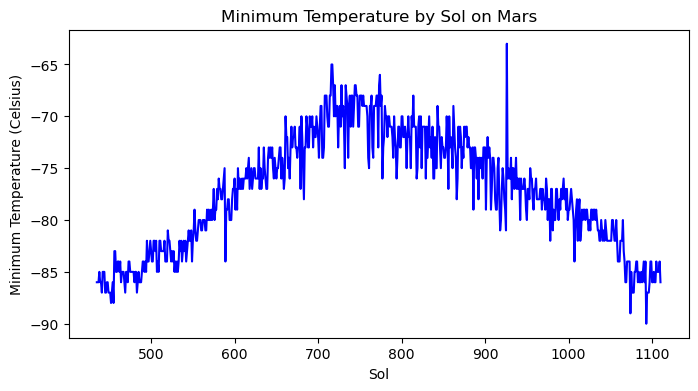

In [222]:
#Divide the data into a smaller section to isolate a period of time.  This will help to determine if there is a pattern
mars_sliced = mars_df.loc[435:1110]
mars_sliced.min_temp.plot(kind='line', color='blue', figsize=(8, 4))
plt.title('Minimum Temperature by Sol on Mars')
plt.xlabel('Sol')
plt.ylabel('Minimum Temperature (Celsius)')
plt.show()

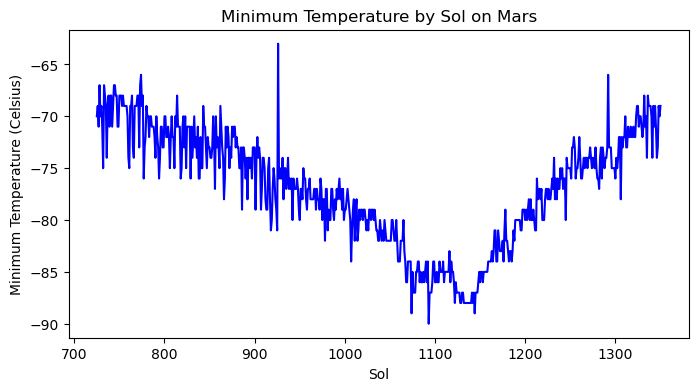

In [223]:
#Taking the value of 675 as obtained from the graph above, apply the same metric to another portion of data to see if the pattern is consistent
mars_sliced = mars_df.loc[725:1350]
mars_sliced.min_temp.plot(kind='line', color='blue', figsize=(8, 4))
plt.title('Minimum Temperature by Sol on Mars')
plt.xlabel('Sol')
plt.ylabel('Minimum Temperature (Celsius)')
plt.show()

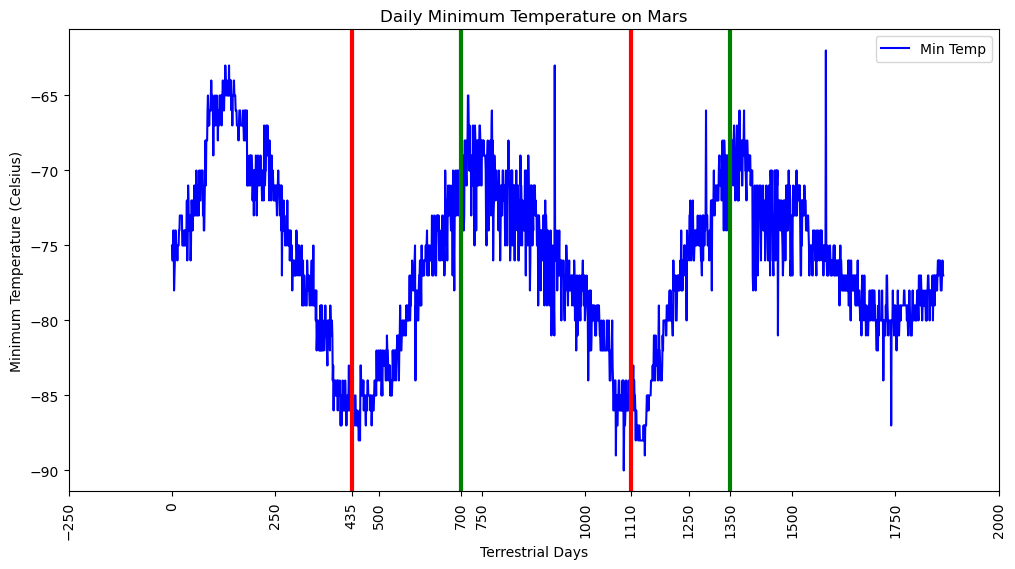

In [224]:
#plot to see where these values align on the graph.  If the peaks are aligned to the same general areas, then its safe to conclude that the data is likely to be a year.
plt.figure(figsize=(12, 6))
plt.plot(days_in_year, mars_df['min_temp'], color='blue')
plt.title('Daily Minimum Temperature on Mars')
plt.axvline(x=435, color='red', linewidth=3)
plt.axvline(x=1110, color='red', linewidth=3)
plt.axvline(x=700, color='green', linewidth=3)
plt.axvline(x=1350, color='green', linewidth=3)
plt.xticks(list(plt.xticks()[0]) + [435, 1110, 700, 1350])
plt.xlabel('Terrestrial Days')
plt.ylabel('Minimum Temperature (Celsius)')
plt.xticks(rotation=90)
plt.legend(['Min Temp'])
plt.show()

#### Minimum Temperature

Based on the data provided the 3rd month of the year is, on average, the coldest tempreture on record.  The data also suggests that the observed area experiences seasonal temperature variations.  The colder periods on record are observed between the 2 - 5 months and the warmer periods happeneing between the 7-10 months.  The environment in this region appears to undergo predictable temperature fluctuations throughout the year. However, additional data would be necessary to determine whether these trends persist over multiple years and if the average temperatures remain consistent year over year.

• The coldest month on Mars is month number 3 at -83.30729166666667

• The hottest month on Mars is month number 8 at -68.38297872340425

#### Atmospheric Pressure

After analysis on the data provided, it was cocluded that the 6th month of the year is, on average, the lowest pressure on record with the 9th month having the highest.  This suggests that the pressure fluctuations in the observed area are not aligned with its seasonal temperature variations. This lack of alignment indicates that temperature may not have a direct correlation with the pressure changes in this region.

• The lowest pressure month on Mars is month number 6 at 745.0544217687075

• The highest pressure month on Mars is month number 9 at 913.3059701492538

#### Year Length

The "Daily Minimum Temperature" graph illustrates the daily temperature variations over a specific period based on terrestrial dates. By focusing on distinct peaks and valleys within the data, the aim to investigate whether temperature fluctuations can serve as indicators for estimating the length of a Martian year.  

Initially, a period between 400 and 1100 days was isolated based on observed patterns in the data. Upon closer examination, trends suggested refining this range to 435 and 1110 days, as it provided a more accurate representation of the underlying patterns. This refined period yielded a value of 675 days.

To validate this estimate, the 675-day period was applied to a different section of the data to assess alignment with the observed patterns (700 and 1350 days). After plotting both sections on the graph, it became evident that the patterns were consistent with the 675-day estimate, suggesting that this value offers a reasonable approximation for the length of a Martian year.  

Based on the extract below from the Nasa Website, a year on Mars is estimated to be 687.  This is based on how long it takes each of the planets in our solar system to orbit around the Sun (in Earth days).

Our estimated value of 675, is close enough to reinforce the conclusion that temperature variation patterns can serve as reliable indicators for determining the length of a Martian year.

In [225]:
# URL of Nasa website
url_nasa = "https://spaceplace.nasa.gov/years-on-other-planets/en/"
response = requests.get(url_nasa)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the Mars section
mars_section = soup.find('strong', string='Mars')

mars_text = mars_section.next_sibling.strip()  
mars_days = int(mars_text.replace(':', '').split()[0])

print(f"A Martian year is {mars_days} Earth days according to Nasa's website.")

A Martian year is 687 Earth days according to Nasa's website.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [226]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index=False)

In [227]:
browser.quit()